In [5]:
import json

final_accs = []

for i in range(0, 10):
    data = json.load(
        open(
            f"/home/VLMClassifier/training_analysis/LAVIS/lavis/output/BLIP2/Caption_imagenet/imagenet_10epochs/result/val_epoch{i}.json"
        )
    )
    labels = json.load(
        open("/home/VLMClassifier/training_analysis/LAVIS/imagenet_lavis_val.json")
    )

    filename2label = {d["image"]: d["caption"][0] for d in labels}
    print(len(filename2label))

    accs = []
    for item in data:
        label = filename2label[item["image_id"]].replace("(", "").replace(")", "")
        pred = item["caption"]
        if label.lower() in pred.lower():
            accs.append(1)
        else:
            accs.append(0)
    final_accs.append(sum(accs) / len(accs))

final_accs = [item * 100 for item in final_accs]
max(final_accs)

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


87.958

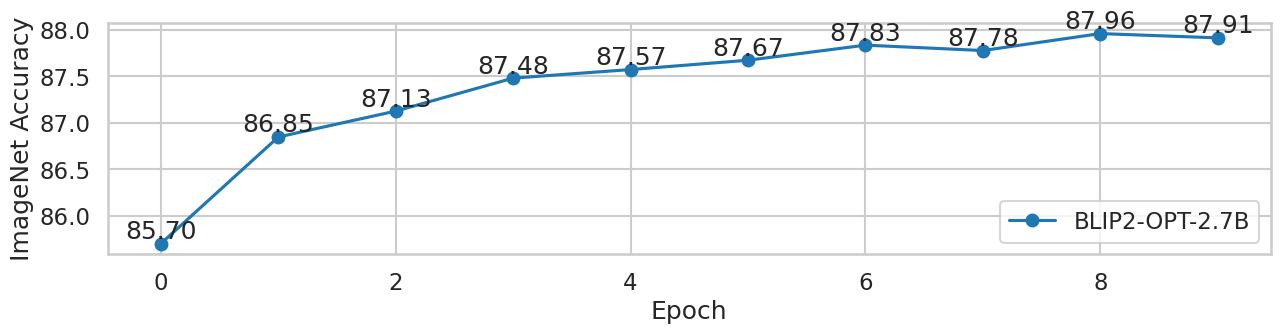

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(15, 3))
plt.plot(final_accs, marker="o", label="BLIP2-OPT-2.7B")
plt.xlabel("Epoch")
plt.ylabel("ImageNet Accuracy")

for i, acc in enumerate(final_accs):
    plt.text(i, acc, f"{acc:.2f}", ha="center", va="bottom")

plt.legend(loc="lower right")